# Instalação

In [1]:
import sys
exe_easyplot_path = r'C:\Users\wande\Documents\GitHub\EASYPLOT_TOOLBOOXdev\easyplot_toolbox'
# exe_easyplot_path = '/home/nero/git-hub projects/EASYPLOTPYDEV/easyplot_toolbox/'
sys.path.append(exe_easyplot_path)
from easyplot import *

### **Dados EV**

In [2]:
import os
import pandas as pd
import numpy as np

# Defina o caminho da pasta onde estão os arquivos Excel
pasta = r'C:\Users\wande\OneDrive\Documentos\GitHub\EASYPLOTPYDEV\result_EV'
melhor = np.inf
melhor_hist = []

# Percorra todos os arquivos na pasta
for arquivo in os.listdir(pasta):
    # Verifique se o arquivo é um arquivo Excel
    if arquivo.endswith('.xlsx') or arquivo.endswith('.xls'):
        # Construa o caminho completo do arquivo
        caminho_arquivo = os.path.join(pasta, arquivo)
        
        # Carregue o arquivo Excel usando pandas
        dados_excel = pd.read_excel(caminho_arquivo)

        # Melhor resultado
        ultimo_result = dados_excel['OF BEST'].iloc[-1]
        melhor_hist.append(ultimo_result)

        if ultimo_result < melhor:
            melhor = ultimo_result
            melhor_arq = caminho_arquivo
        else:
            pass
print("melhor rodada: ", melhor_arq, "\nmelhor result of: ", melhor)

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'C:\\Users\\wande\\OneDrive\\Documentos\\GitHub\\EASYPLOTPYDEV\\result_EV'

In [ ]:
import statistics

# Lista de resultados
resultados = melhor_hist.copy()

# Calculando a média
media = statistics.mean(resultados)

# Calculando o desvio padrão
desvio_padrao = statistics.stdev(resultados)

# Encontrando o valor mínimo e máximo
minimo = min(resultados)
maximo = max(resultados)

print("Média:", media)
print("Desvio Padrão:", desvio_padrao)
print("Valor Mínimo:", minimo)
print("Valor Máximo:", maximo)

Média: 25.255932261731754
Desvio Padrão: 11.532286954373895
Valor Mínimo: 11.46032016321747
Valor Máximo: 64.7231040921633


### **Plotando o gráfico do EV - Comportamento OF**

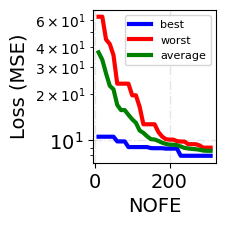

In [4]:
# Data statement
caminho_arquivo = r'C:\Users\wande\Documents\GitHub\EASYPLOT_TOOLBOOXdev\result_EV\of-de-finning-tune-result-0-output.xlsx'
dados_excel = pd.read_excel(caminho_arquivo)
df =  {
        'y0': list(dados_excel['OF BEST']),
        'x0': list(dados_excel['neof']),
        'y1': list(dados_excel['OF WORST']),
        'x1': list(dados_excel['neof']),
        'y2': list(dados_excel['OF AVG']),
        'x2': list(dados_excel['neof'])
      }

# Chart setup
chart_config = {
                'name': 'EV-OF-BEST',
                'width': 6.0, 
                'height': 6.0,
                'extension': 'png',
                'dots per inch': 600, 
                'marker': [None, None, None],
                'marker size': [None, None, None],
                'line width': [3, 3, 3],
                'line style': ['-', '-', '-'],
                'x axis label': 'NOFE',
                'x axis size': 14,
                'y axis label': 'Loss (MSE)',
                'y axis size': 14,
                'axises color': 'black',
                'labels size': 14,
                'labels color': 'black',
                'chart color': ['blue', 'red', 'green'],
                'on grid?': True,
                'legend': ['best', 'worst', 'average'], 
                'legend location': 'upper right',
                'x limit': None,
                'y limit': None,
                'size legend': 8,
                'y log': True,
                'x log': False,
            }

# Call function
line_chart(dataset=df, plot_setup=chart_config)

### **Plotando o gráfico do EV - Histograma OF**

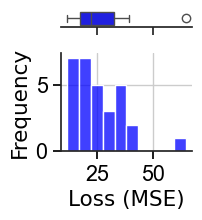

In [ ]:
# Chart config
chart_config = {
              'name': "EV-OF-BEST-HISTOGRAM",
              'width': 6., 
              'height': 6.,
              'extension': 'png',
              'dots per inch': 600,
              'x axis label': 'Loss (MSE)',
              'x axis size': 15.5,
              'y axis label': 'Frequency',
              'y axis size': 15.5,
              'axises color': 'black',
              'labels size': 15.5,
              'labels color': 'black', 
              'chart color': 'blue',
              'bins': 10,
             }

# Call function
histogram_chart(dataset=melhor_hist, plot_setup=chart_config)

In [ ]:
# x = [3.943335686, 2.334692379, 0.02214798358, 124.2946143]

In [ ]:
df = {}
color = []
num = []
cont = 0

# Percorra todos os arquivos na pasta
for arquivo in os.listdir(pasta):
    # Verifique se o arquivo é um arquivo Excel
    if arquivo.endswith('.xlsx') or arquivo.endswith('.xls'):
        # Construa o caminho completo do arquivo
        caminho_arquivo = os.path.join(pasta, arquivo)
        
        # Carregue o arquivo Excel usando pandas
        dados_excel = pd.read_excel(caminho_arquivo)

        # Melhor resultado
        df[f'x{cont}'] = list(dados_excel['neof'])
        df[f'y{cont}'] = list(dados_excel['OF BEST'])
        if dados_excel['OF BEST'].iloc[-1] < 15:
            color.append('#B8B8B8')
            num.append(1)
        else:
            color.append('#B8B8B8')
    cont += 1

# Chart setup
chart_config = {
                'name': 'EV-best-scatter',
                'width': 6.0, 
                'height': 6.0,
                'dots per inch': 600, 
                'extension': 'png',
                'marker size': 50,
                'color map': color,
                'x axis label': 'NOFE',
                'x axis size': 15,
                'y axis label': 'Loss (MSE)',
                'y axis size': 15,
                'axises color': 'black', 
                'labels size': 15,
                'labels color': 'black',
                'on grid?': False,
                'y log': False,
                'x log': False,
                'legend': [None]*30,
                'legend location': None,
                'size legend': 12,
               }

# Call function
scatter_chart(dataset=df, plot_setup=chart_config)
print(sum(num)/30*100, sum(num))

20.0 6
